In [57]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np


In [58]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('plantvillage', shuffle = True, image_size=(256, 256), batch_size = 32)

Found 2152 files belonging to 3 classes.


In [59]:
class_names = dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [60]:
len(dataset)


68

In [61]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)
    print(label_batch.numpy())
    

(256, 256, 3)
[2 1 1 1 1 1 1 1 2 0 1 1 0 1 0 0 0 1 0 2 0 1 2 1 1 1 1 1 2 0 0 0]


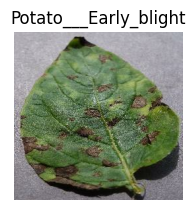

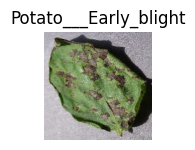

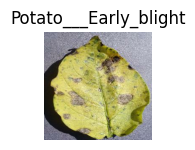

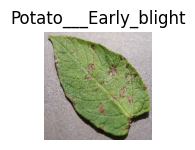

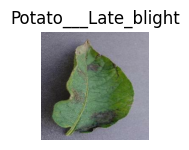

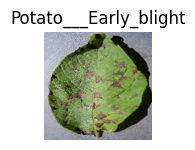

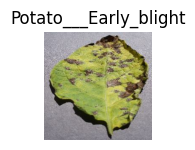

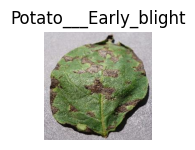

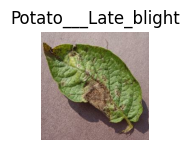

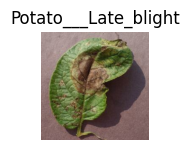

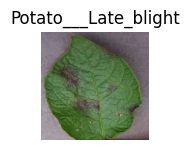

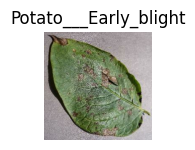

<Figure size 640x480 with 0 Axes>

In [62]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype(np.uint8))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')
    plt.show()
    plt.tight_layout()

In [63]:
#80% ==> training
#20% ==> 10% validation, 10% test

train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [64]:
train_ds = dataset.take(54)
len(train_ds)

54

In [65]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [66]:
test_ds = dataset.skip(54)
len(test_ds)


14

In [67]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [68]:
test_ds = test_ds.skip(6)
len(test_size)

8

In [69]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
  ds_size = len(ds)

  if shuffle:
    ds= ds.shuffle(shuffle_size, seed = 12)
  train_split = int(ds_size*training)
  val_split =  int(val_size*ds_size)

  train_ds = ds.take(train_split)
  val_ds = ds.skip(train_split).take(val_split)
  test_ds =  ds.skip(train_split).skip(val_split)

  return train_ds, val_ds, test_ds



In [70]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [71]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [72]:
#data preprocessing
rescale_resize = tf.keras.Sequential([layers.Resizing(255, 255), layers.Rescaling(1.0/255)])

In [73]:
data_agumentation = tf.keras.Sequential([layers.RandomFlip("horizontal_and_vertical"), layers.RandomRotation(0.2)])

In [74]:

input_size = (32, 256, 256, 3)  # batch size, height, width, channels
n_classes = 3

model = models.Sequential([
    rescale_resize,         # Your rescaling or resizing layer if defined
    data_agumentation,      # Your data augmentation layer if defined
    layers.Conv2D(32, (3, 3), activation='relu', input_shape= input_size),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')  # For multi-class classification softmax activation function is used to normalise the probility of your class
])

model.build(input_shape=input_size)  # Building model with input shape
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_7 (Sequential)       │ (32, 255, 255, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_8 (Sequential)       │ (32, 255, 255, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (32, 253, 253, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 126, 126, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (32, 124, 124, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (32, 28, 28, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (32, 14, 14, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (32, 25088)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (32, 64)               │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,736,067 (6.62 MB)

 Trainable params: 1,736,067 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [80]:
history = model.fit(train_ds, batch_size=32, epochs = 10, validation_data=val_ds)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.5750 - loss: 0.8355 - val_accuracy: 0.8438 - val_loss: 0.4629
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.8546 - loss: 0.4244 - val_accuracy: 0.8854 - val_loss: 0.3088
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8775 - loss: 0.2939 - val_accuracy: 0.8698 - val_loss: 0.2810
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8728 - loss: 0.3226 - val_accuracy: 0.8802 - val_loss: 0.2849
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9441 - loss: 0.1616 - val_accuracy: 0.9479 - val_loss: 0.1134
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9331 - loss: 0.1693 - val_accuracy: 0.8698 - val_loss: 0.3012
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9454 - loss: 0.1360 - val_accuracy: 0.9219 - val_loss: 0.1644
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9341 - loss: 0.1646 - val_accuracy: 0.9271 - v

In [81]:
score = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9837 - loss: 0.0589 


In [83]:
history

In [84]:
print(history.params)

{'verbose': 'auto', 'epochs': 10, 'steps': 54}


In [85]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss =  history.history['loss']
val_loss =  history.history['val_loss']

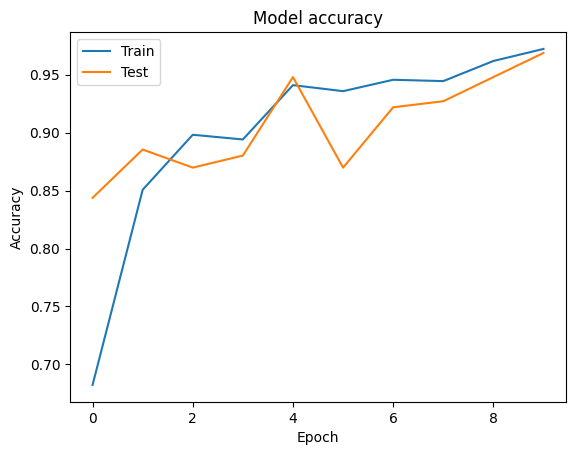

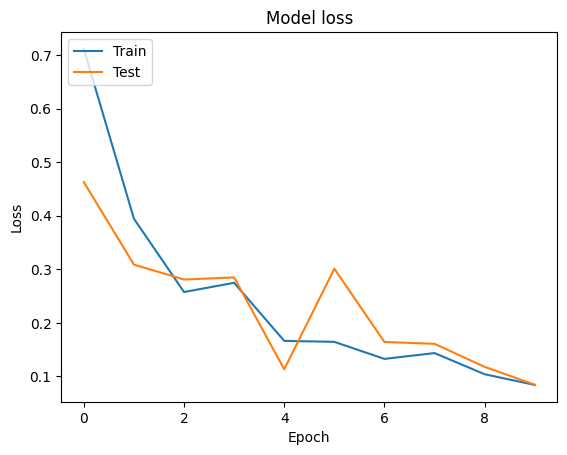

In [82]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


first image to predict
first image actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step
predicted label: Potato___Early_blight


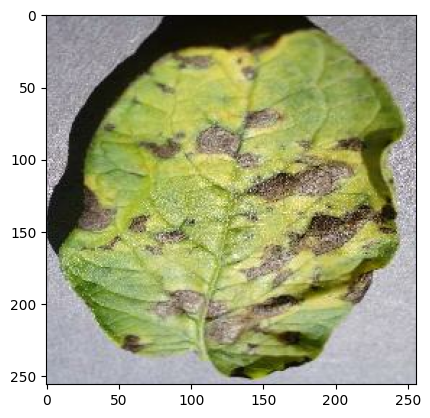

In [101]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy(). astype('uint8')
    first_label = label_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print('first image actual label:', class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print('predicted label:', class_names[np.argmax(batch_prediction[0])])

In [114]:
def predict (model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #ceate a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


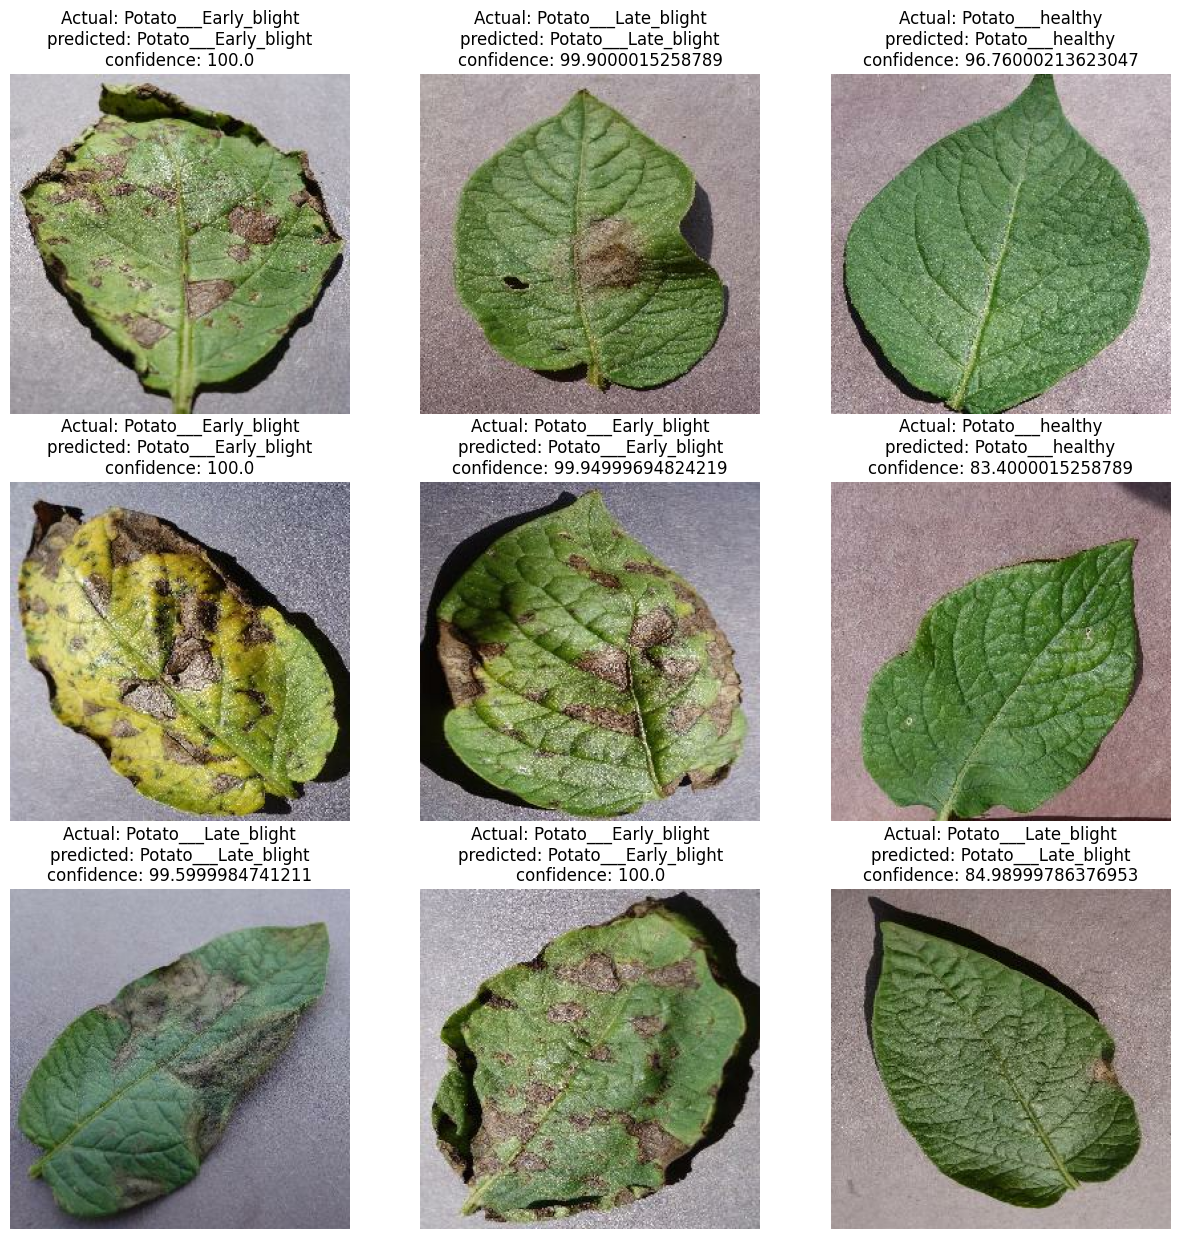

In [126]:

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        predicted_class, confidence = predict(model, images[i].numpy())

        actual_class = class_names[labels[i]]


        plt.title(f'Actual: {actual_class}\npredicted: {predicted_class}\nconfidence: {confidence}')
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')
        